<a href="https://colab.research.google.com/github/Thahraf/workshop-2/blob/main/data_science_housing_pred_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Calling DataFrame constructor
df = pd.read_csv('housing.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

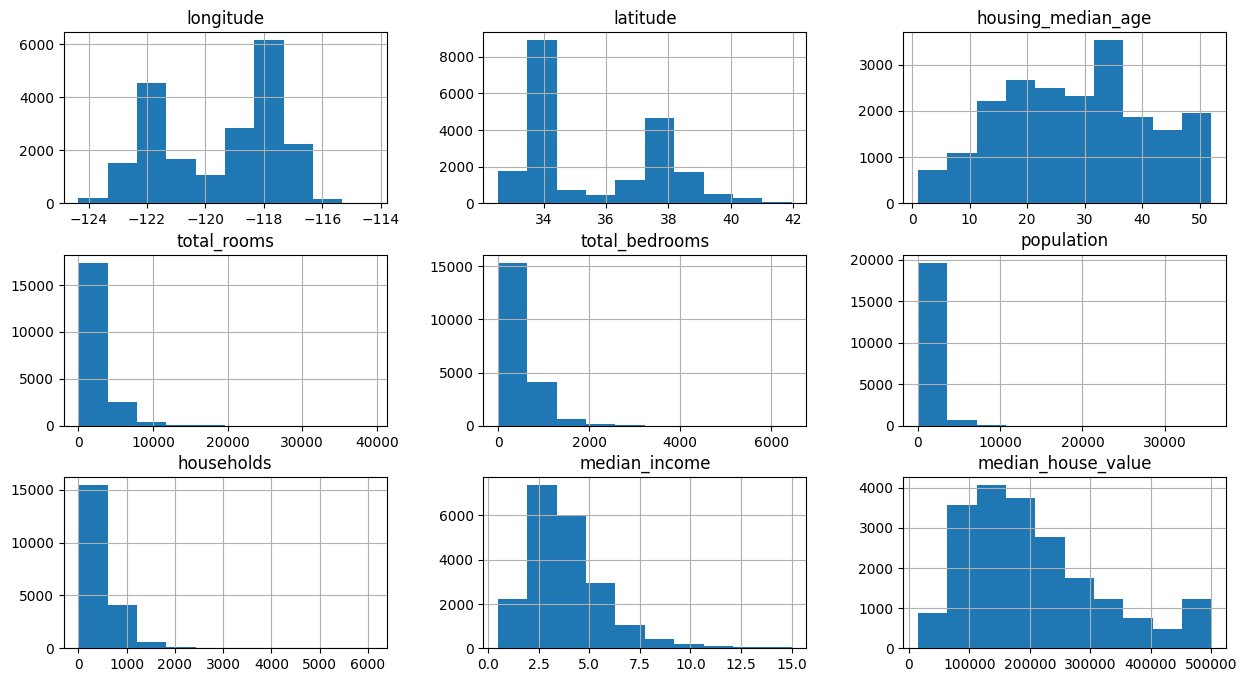

In [ ]:
import matplotlib.pyplot as plt

df.hist(figsize=(15,8))

<Axes: >

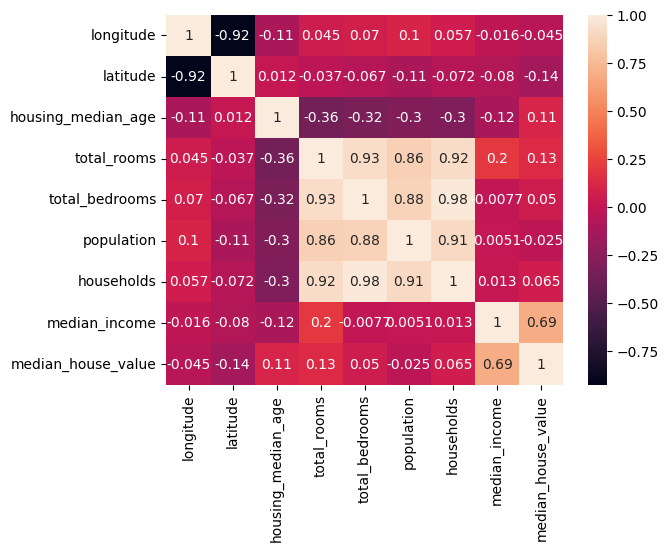

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [ ]:
import numpy as np
df['households'] = np.log(df['households'])
df['total_rooms'] = np.log(df['total_rooms'])
df['total_bedrooms'] = np.log(df['total_bedrooms'])
df['population'] = np.log(df['population'])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

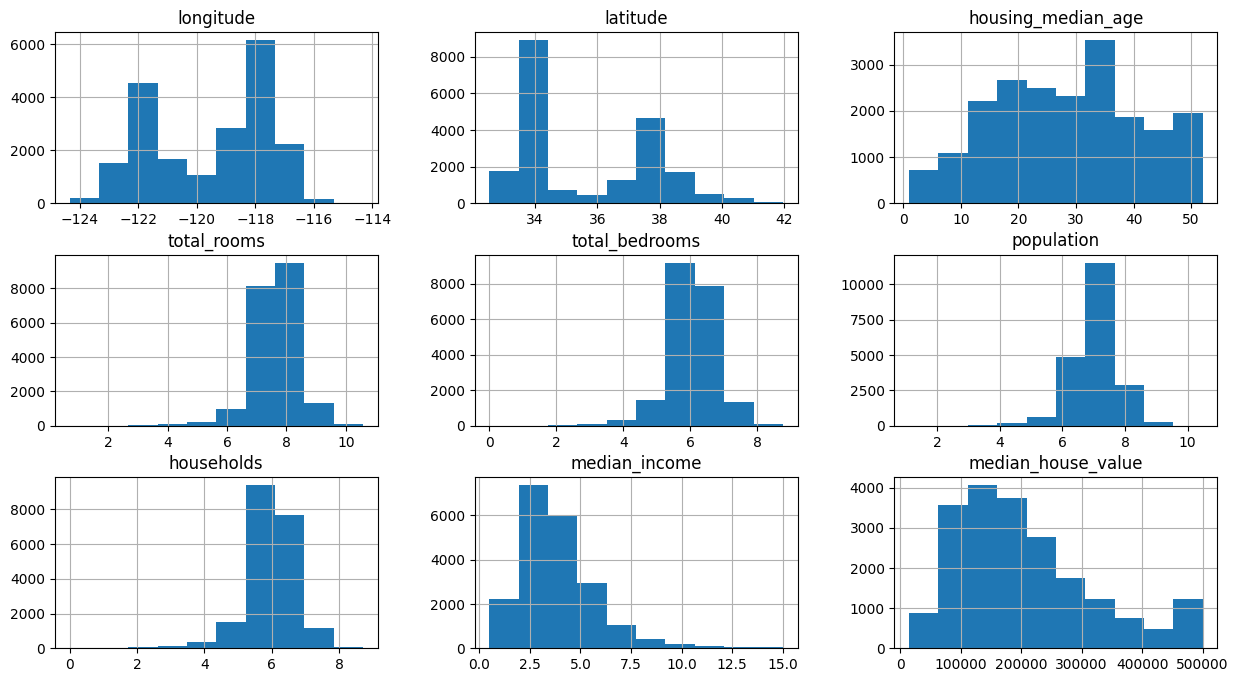

In [ ]:
df.hist(figsize=(15,8))

In [ ]:
ocean_proximity_encoded = pd.get_dummies(df['ocean_proximity'], prefix='', drop_first=False, dtype=int)

In [ ]:
data = df.join(ocean_proximity_encoded).drop(['ocean_proximity'],axis=1)

<Axes: >

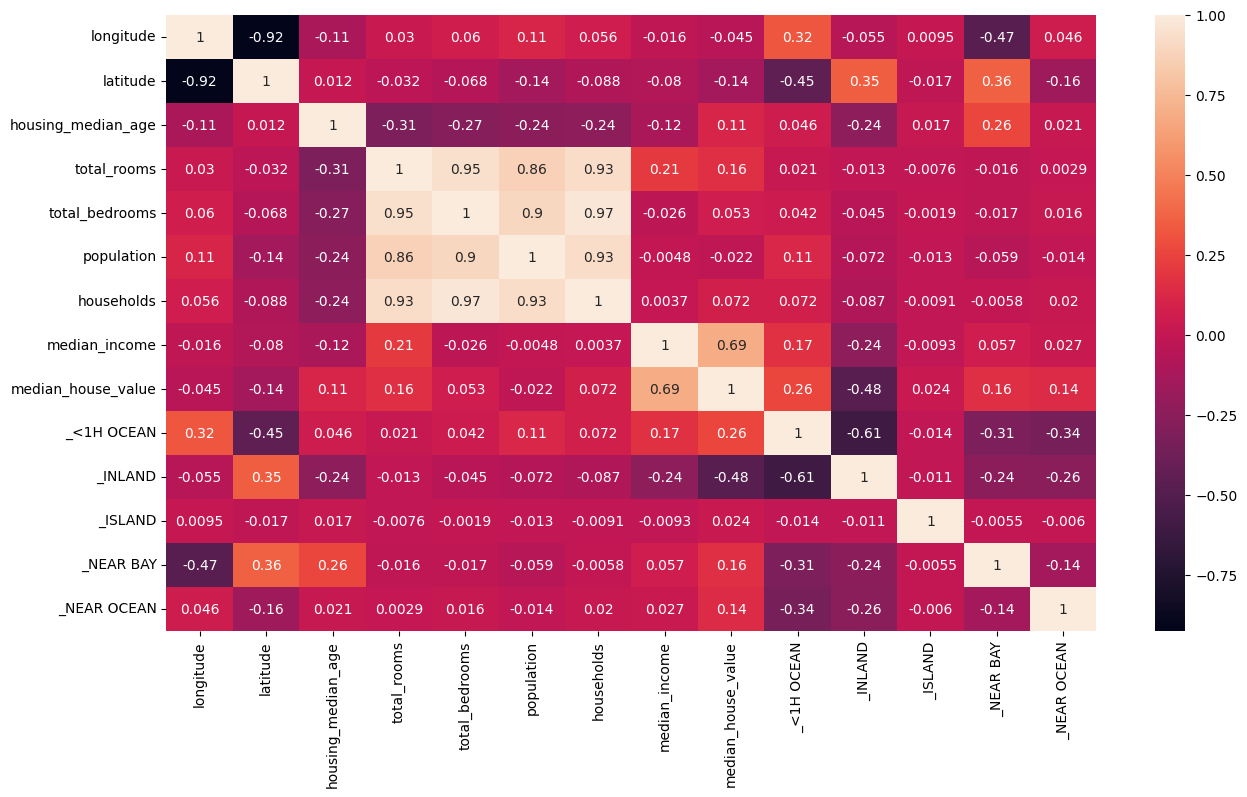

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True),annot = True)

<Axes: xlabel='latitude', ylabel='longitude'>

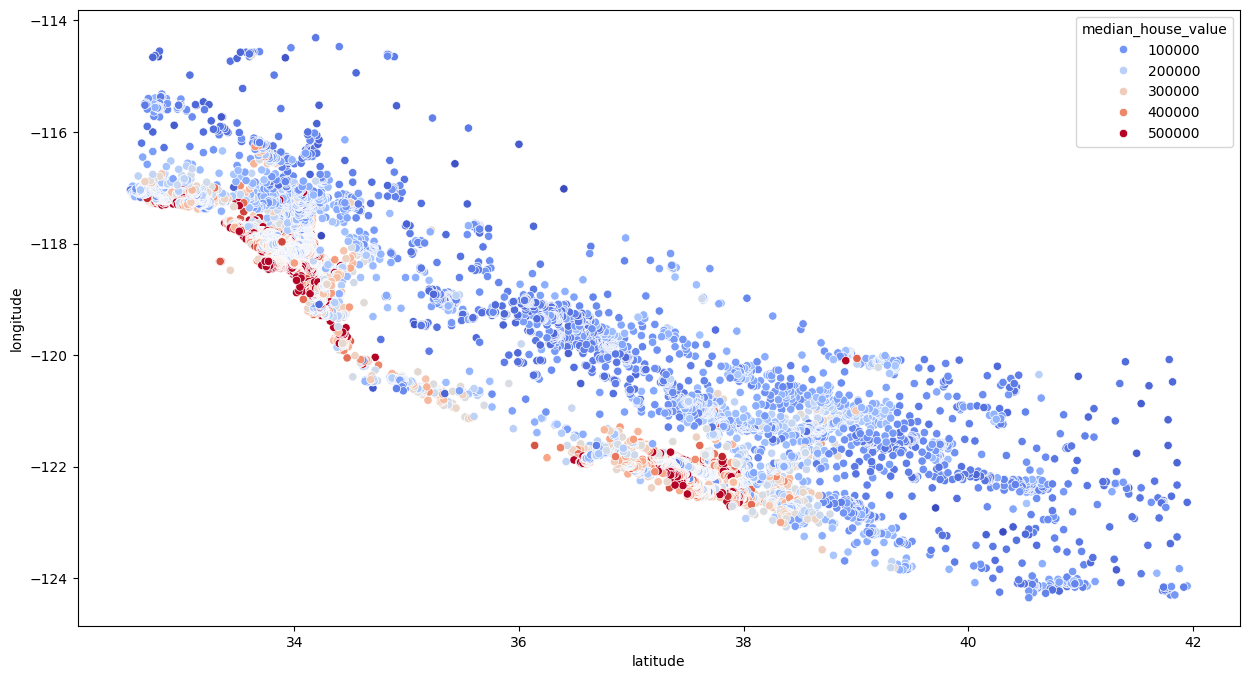

In [ ]:
plt.figure(figsize=(15,8))

sns.scatterplot(data = data, x='latitude',y='longitude',hue='median_house_value', palette ='coolwarm')

In [ ]:
data['bedroom ratio'] = data['total_bedrooms']/data['total_rooms']
data['household ratio'] = data['total_rooms']/data['households']

<Axes: >

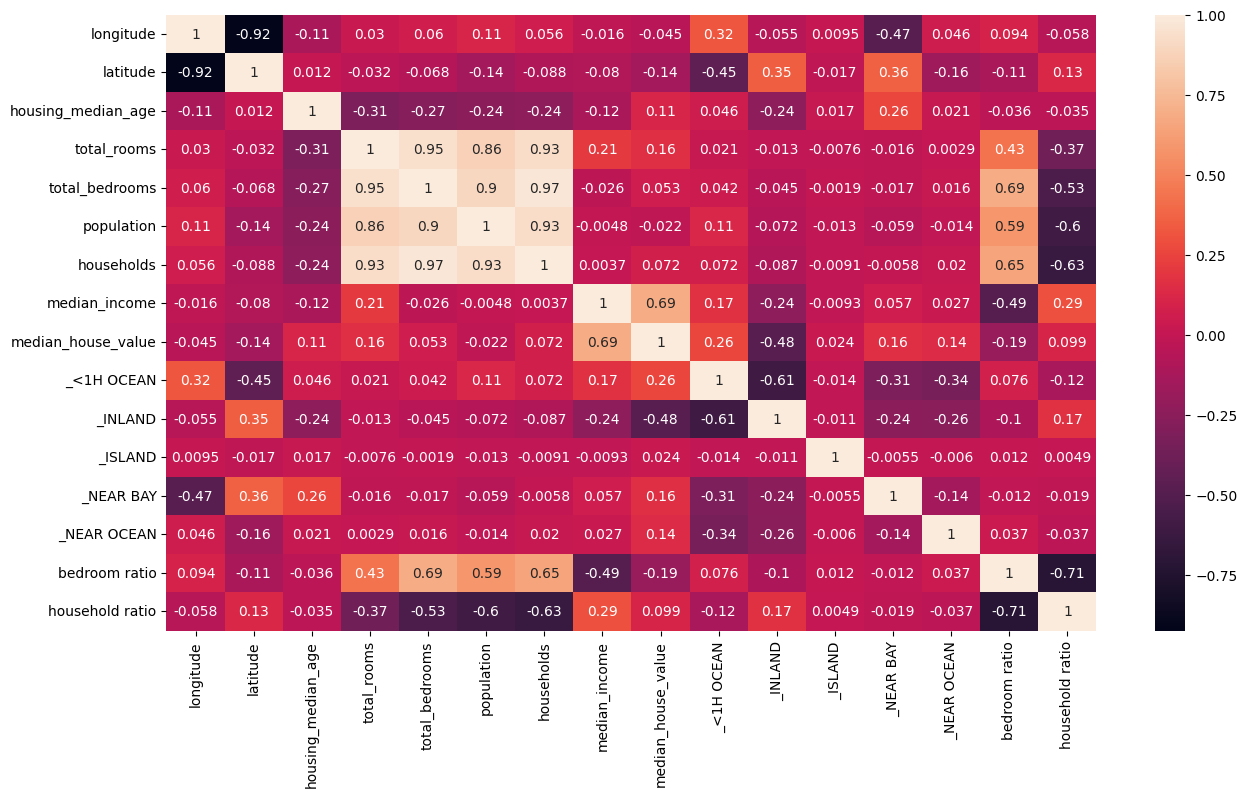

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True),annot = True)

In [ ]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

reg = LinearRegression()
X = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = reg.predict(X_test)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')

R2 Score: 0.6677155356283369
MSE: 4499418915.9900465


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled,y_train)

y_pred = reg.predict(X_test_scaled)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print(f'R2 Score after scaled: {r2}')
print(f'MSE after scaled: {mse}')

R2 Score after scaled: 0.6677155356283369
MSE after scaled: 4499418915.990047


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [ ]:
r2 = r2_score(y_test,y_pred_rf)
mse = mean_squared_error(y_test,y_pred_rf)
print(f'R2 for random forest : {r2}')
print(f'MSE for random forest: {mse}')

R2 for random forest : 0.8166917409929676
MSE for random forest: 2482152301.6222634


In [ ]:
from sklearn.model_selection import GridSearchCV
rf_reg = RandomForestRegressor()
param_grid = {
    'n_estimators': [100,200],
    'max_features': [12,14,16],
    'min_samples_split':[2,4,6]

}
grid_search =GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train,y_train)

In [ ]:
best_rf = grid_search.best_estimator_
best_rf

RandomForestRegressor(min_samples_split=4, n_estimators=60)

In [ ]:
best_rf.score(X_test,y_test)

0.8128931374971624